In [ ]:
!chmod 600 ~/.passwd-s3fs

In [ ]:
!apt install s3fs

In [ ]:
!mkdir /content/s3
!s3fs um2ii-datasets /content/s3

In [ ]:
!pip install chmod

In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics
import matplotlib.pyplot as plt

MIMIC Race Validation on VinDr-PCXR Dataset

In [ ]:
test_dir = '/content/Vindr_PCXR_Peds_Chest_X-Ray_Data'
test_df = pd.read_csv('/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/vinDR_peds_labels.csv')
test_df['Path'] = '/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/' + test_df['Path'].astype(str)

In [ ]:
mimic_race_model = load_learner('/content/mimic_race.pkl')
mimic_race_model.dls.to(device='cuda')
mimic_race_model.model.to(device='cuda')

In [ ]:
race_test_dl = mimic_race_model.dls.test_dl(test_df)
race_preds = mimic_race_model.get_preds(dl=race_test_dl, with_decoded=True)
mimic_race_model.dls.vocab.o2i

{'Asian': 0, 'Black': 1, 'Hispanic/Latino': 2, 'Other': 3, 'White': 4}

                                                                                Path  \
0     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/000295d6ff55184f19d99e95f93c3a55.jpg   
1     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/0008e7acbcdf2fedd05cc236e5594074.jpg   
2     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/000f60ed28579e82c402b99fcff67ef5.jpg   
3     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/0018c771a8e8c20e6d7d5bc8e64181b4.jpg   
4     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/001c350dcc2ecc107afb19512f33b927.jpg   
...                                                                              ...   
9120  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/fef268e6a11bd1d8afd467637a9be995.jpg   
9121  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff3e527e8c2514dd7afff6ed0fddef4c.jpg   
9122  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff41e5847ab5cd928c2ade1c18bfa067.jpg   
9123  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff74cc4098b6a2ad94597078b211a69e.jpg   
9124  /content/vinDR_PCXR_Peds_C

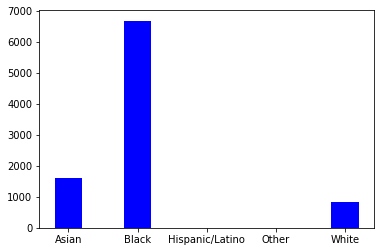

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/mimic_race_vindr_peds_test.csv')
race_labels = mimic_race_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2), race_preds[2].tolist().count(3), race_preds[2].tolist().count(4)]
plt.bar(race_labels, prediction_counts, color ='blue',
        width = 0.4)
print(np.array(prediction_counts)/len(race_preds[2]))

CheXpert Race v2 Validation on VinDr-PCXR Dataset

In [ ]:
test_df = pd.read_csv('/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/vinDR_peds_labels.csv')
test_df['Path'] = 'vinDR_PCXR_Peds_Chest_X-Ray_Data/' + test_df['Path'].astype(str)
chexpert_v2_race_model = load_learner('/content/chexpert_race2.pkl')
chexpert_v2_race_model.dls.to(device='cuda')
chexpert_v2_race_model.model.to(device='cuda')
race_test_dl = chexpert_v2_race_model.dls.test_dl(test_df)
race_preds = chexpert_v2_race_model.get_preds(dl=race_test_dl, with_decoded=True)
chexpert_v2_race_model.dls.vocab.o2i

{'Hispanic/Latino': 0,
 'Non-Hispanic Asian': 1,
 'Non-Hispanic Black': 2,
 'Non-Hispanic White': 3}

                                                                       Path  \
0     vinDR_PCXR_Peds_Chest_X-Ray_Data/000295d6ff55184f19d99e95f93c3a55.jpg   
1     vinDR_PCXR_Peds_Chest_X-Ray_Data/0008e7acbcdf2fedd05cc236e5594074.jpg   
2     vinDR_PCXR_Peds_Chest_X-Ray_Data/000f60ed28579e82c402b99fcff67ef5.jpg   
3     vinDR_PCXR_Peds_Chest_X-Ray_Data/0018c771a8e8c20e6d7d5bc8e64181b4.jpg   
4     vinDR_PCXR_Peds_Chest_X-Ray_Data/001c350dcc2ecc107afb19512f33b927.jpg   
...                                                                     ...   
9120  vinDR_PCXR_Peds_Chest_X-Ray_Data/fef268e6a11bd1d8afd467637a9be995.jpg   
9121  vinDR_PCXR_Peds_Chest_X-Ray_Data/ff3e527e8c2514dd7afff6ed0fddef4c.jpg   
9122  vinDR_PCXR_Peds_Chest_X-Ray_Data/ff41e5847ab5cd928c2ade1c18bfa067.jpg   
9123  vinDR_PCXR_Peds_Chest_X-Ray_Data/ff74cc4098b6a2ad94597078b211a69e.jpg   
9124  vinDR_PCXR_Peds_Chest_X-Ray_Data/ff9c3524b745308c2e1e4167839ea759.jpg   

     Sex   Age  Race/Ethnicity_Tensor_Id  \
0      

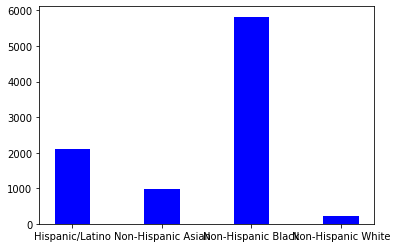

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_race2_vindr_peds_test.csv')
race_labels = chexpert_v2_race_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2), race_preds[2].tolist().count(3)]
plt.bar(race_labels, prediction_counts, color ='blue',
        width = 0.4)
print(np.array(prediction_counts)/len(race_preds[2]))